In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
users = pd.read_csv('users.dat' , delimiter = '::' , names = ['userid' , 'gender' , 'age' ,'occupation' ,'zip_code'])
movies = pd.read_csv('movies.dat' , delimiter = '::' , names = ['movieid' , 'title' , 'genres'])
ratings = pd.read_csv('ratings.dat' , delimiter = '::' , names = ['userid' , 'movieid' , 'rating' , 'timestamp'])

In [3]:
print(users.shape)
print(movies.shape)
print(ratings.shape)

(6040, 5)
(3883, 3)
(1000209, 4)


In [4]:
users.head()

,userid,gender,age,occupation,zip_code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [5]:
ratings.head()

,userid,movieid,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
movies.head()

,movieid,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
df = pd.merge(users , ratings , on= 'userid')

In [8]:
master_data = pd.merge(movies,df, on = 'movieid')

In [9]:
master_data[master_data.duplicated()] # there are no duplicate values

,movieid,title,genres,userid,gender,age,occupation,zip_code,rating,timestamp


In [10]:
#Checking for wrong entries in the dataframe like symbols -,?,#,*,etc.
for col in master_data.columns:
    print('{}:{}'.format(col,master_data[col].unique()))

movieid:[   1    2    3 ... 3950 3951 3952]
title:['Toy Story (1995)' 'Jumanji (1995)' 'Grumpier Old Men (1995)' ...
 'Tigerland (2000)' 'Two Family House (2000)' 'Contender, The (2000)']
genres:["Animation|Children's|Comedy" "Adventure|Children's|Fantasy"
 'Comedy|Romance' 'Comedy|Drama' 'Comedy' 'Action|Crime|Thriller'
 "Adventure|Children's" 'Action' 'Action|Adventure|Thriller'
 'Comedy|Drama|Romance' 'Comedy|Horror' "Animation|Children's" 'Drama'
 'Action|Adventure|Romance' 'Drama|Thriller' 'Drama|Romance' 'Thriller'
 'Action|Comedy|Drama' 'Crime|Drama|Thriller' 'Drama|Sci-Fi' 'Romance'
 'Adventure|Sci-Fi' 'Adventure|Romance' "Children's|Comedy|Drama"
 'Documentary' 'Drama|War' 'Action|Crime|Drama' 'Action|Adventure'
 'Crime|Thriller' "Animation|Children's|Musical|Romance"
 "Children's|Comedy" 'Drama|Mystery' 'Sci-Fi|Thriller'
 'Action|Comedy|Crime|Horror|Thriller' 'Drama|Musical'
 'Crime|Drama|Romance' 'Adventure|Drama' 'Action|Thriller'
 "Adventure|Children's|Comedy|Musical" 'Act

In [11]:
master_data.head(20)

,movieid,title,genres,userid,gender,age,occupation,zip_code,rating,timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,F,1,10,48067,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,F,50,9,55117,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,M,25,12,11413,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,M,25,17,61614,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,F,35,1,95370,5,978226474
5,1,Toy Story (1995),Animation|Children's|Comedy,18,F,18,3,95825,4,978154768
6,1,Toy Story (1995),Animation|Children's|Comedy,19,M,1,10,48073,5,978555994
7,1,Toy Story (1995),Animation|Children's|Comedy,21,M,18,16,99353,3,978139347
8,1,Toy Story (1995),Animation|Children's|Comedy,23,M,35,0,90049,4,978463614
9,1,Toy Story (1995),Animation|Children's|Comedy,26,M,25,7,23112,3,978130703


In [12]:
master_data.shape

(1000209, 10)

In [13]:
master_data.corr()

,movieid,userid,age,occupation,rating,timestamp
movieid,1.000000,-0.017739,0.027575,0.008585,-0.064042,0.041632
userid,-0.017739,1.000000,0.034688,-0.026698,0.012303,-0.490383
age,0.027575,0.034688,1.000000,0.078371,0.056869,-0.064562
occupation,0.008585,-0.026698,0.078371,1.000000,0.006753,0.015646
rating,-0.064042,0.012303,0.056869,0.006753,1.000000,-0.026770
timestamp,0.041632,-0.490383,-0.064562,0.015646,-0.026770,1.000000


### Explore the datasets using visual representations (graphs or tables):
User Age Distribution

Text(0, 0.5, 'Frequency')

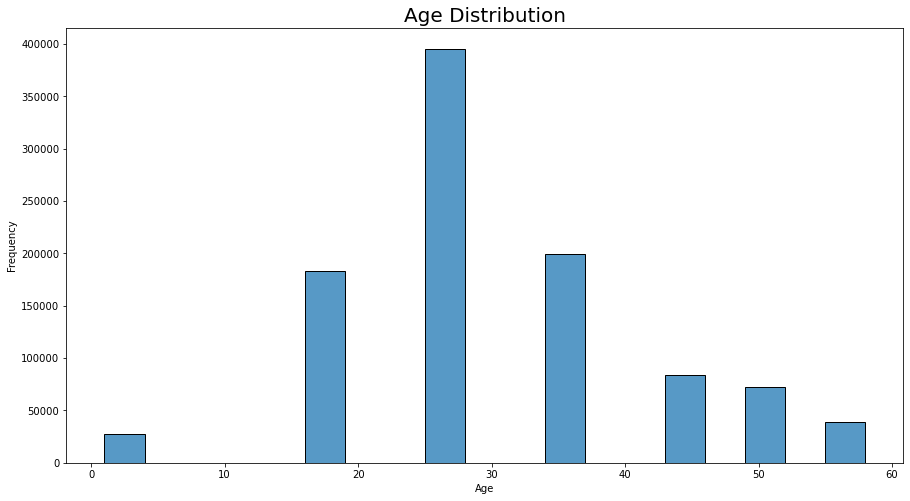

In [14]:
plt.figure(figsize=(15,8))
sns.histplot(master_data['age'],binwidth=3, bins=10,palette="Set3")
plt.title('Age Distribution',fontsize=20)
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

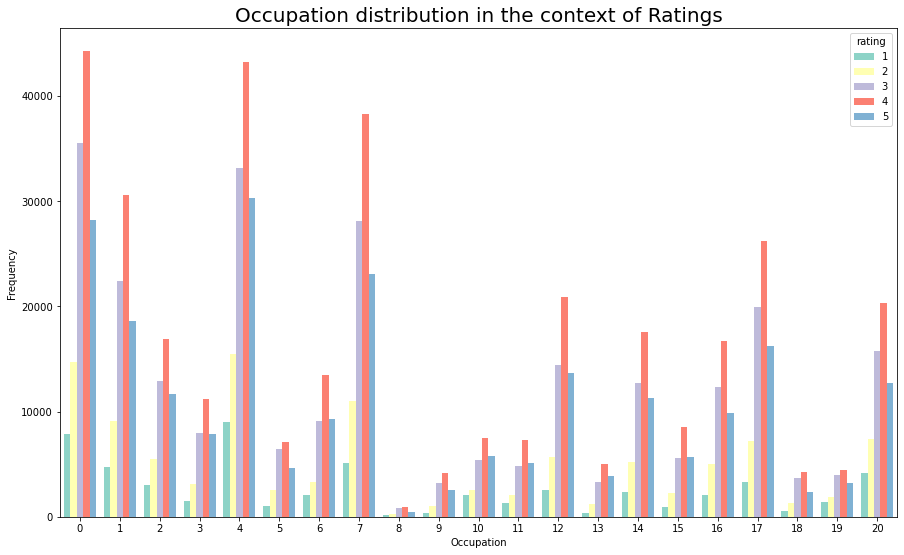

In [15]:
plt.figure(figsize=(15,9))
sns.countplot(master_data['occupation'],hue=master_data['rating'],dodge=True, saturation=1.1,palette="Set3")
plt.title('Occupation distribution in the context of Ratings',fontsize=20)
plt.xlabel('Occupation')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

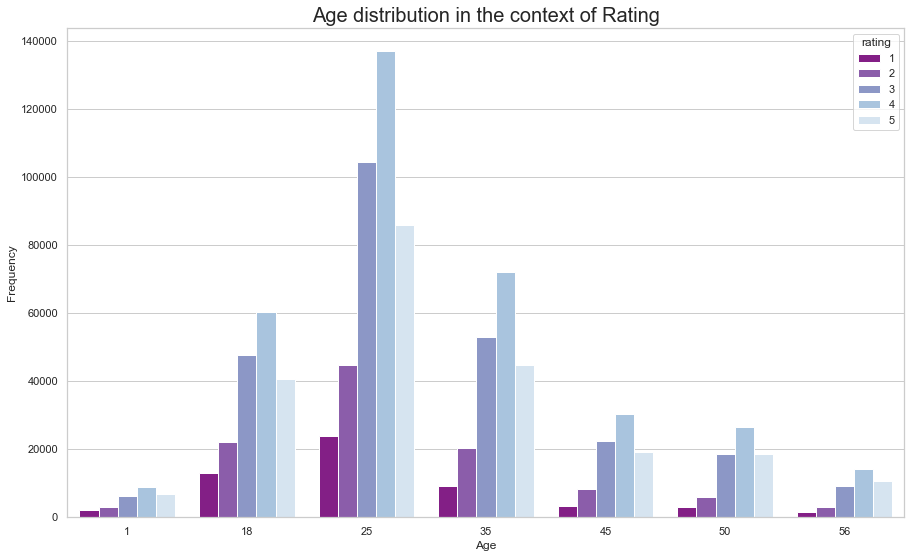

In [16]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(15,9))
sns.countplot(master_data['age'],hue=master_data['rating'],saturation=1.1,palette="BuPu_r")
plt.title('Age distribution in the context of Rating',fontsize=20)
plt.xlabel('Age')
plt.ylabel('Frequency')

In [17]:
master_data_dummy = master_data.copy()

In [18]:
master_data_dummy.drop(['movieid','userid'],axis=1, inplace=True)

In [19]:
master_data_dummy.head(15)

,title,genres,gender,age,occupation,zip_code,rating,timestamp
0,Toy Story (1995),Animation|Children's|Comedy,F,1,10,48067,5,978824268
1,Toy Story (1995),Animation|Children's|Comedy,F,50,9,55117,4,978237008
2,Toy Story (1995),Animation|Children's|Comedy,M,25,12,11413,4,978233496
3,Toy Story (1995),Animation|Children's|Comedy,M,25,17,61614,5,978225952
4,Toy Story (1995),Animation|Children's|Comedy,F,35,1,95370,5,978226474
5,Toy Story (1995),Animation|Children's|Comedy,F,18,3,95825,4,978154768
6,Toy Story (1995),Animation|Children's|Comedy,M,1,10,48073,5,978555994
7,Toy Story (1995),Animation|Children's|Comedy,M,18,16,99353,3,978139347
8,Toy Story (1995),Animation|Children's|Comedy,M,35,0,90049,4,978463614
9,Toy Story (1995),Animation|Children's|Comedy,M,25,7,23112,3,978130703


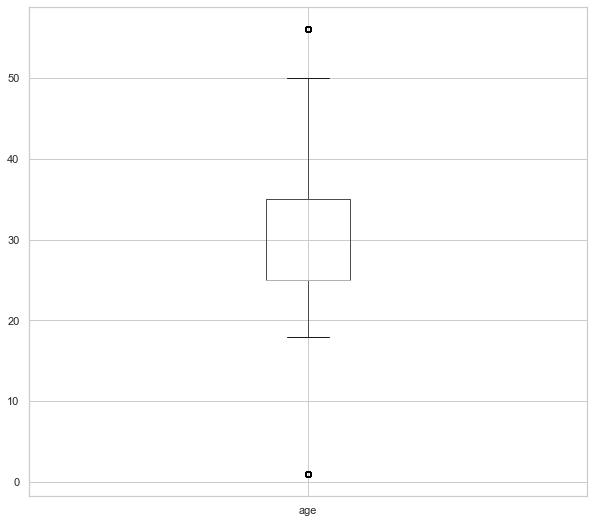

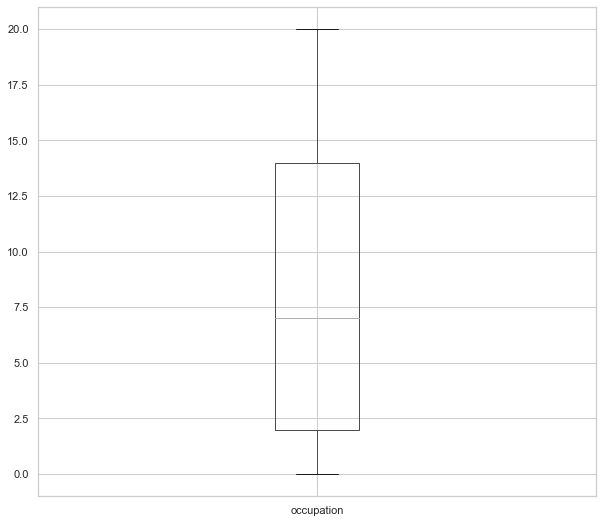

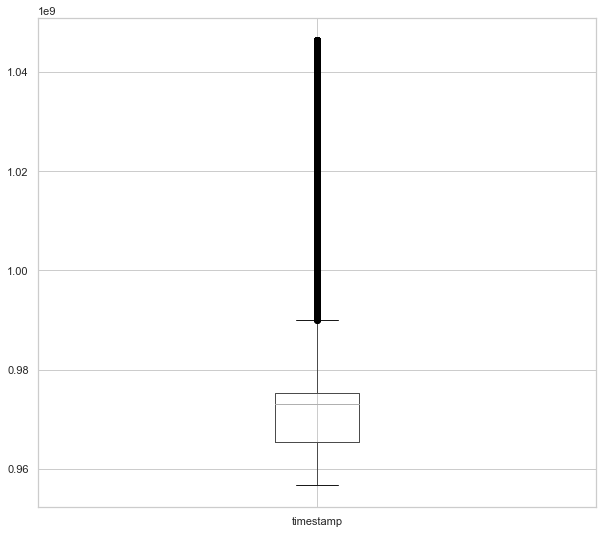

In [20]:
#checking outliers
for i in master_data_dummy.loc[:,['age','occupation','timestamp']]:
    plt.figure(figsize=(10,9))
    master_data_dummy.boxplot([i])    

In [21]:
# Outliers Treatments
q1 = np.percentile(master_data_dummy['age'],25)
q3 = np.percentile(master_data_dummy['age'],75)
iqr = q3-q1
outlier = master_data_dummy[(master_data_dummy['age']>q3+1.5*iqr) | (master_data_dummy['age']<q1-1.5*iqr)]
outlier

,title,genres,gender,age,occupation,zip_code,rating,timestamp
0,Toy Story (1995),Animation|Children's|Comedy,F,1,10,48067,5,978824268
6,Toy Story (1995),Animation|Children's|Comedy,M,1,10,48073,5,978555994
18,Toy Story (1995),Animation|Children's|Comedy,F,1,10,10562,5,977947828
24,Toy Story (1995),Animation|Children's|Comedy,F,1,10,01748,5,977851099
27,Toy Story (1995),Animation|Children's|Comedy,M,56,1,49327,3,977786904
...,...,...,...,...,...,...,...,...
1000142,"Contender, The (2000)",Drama|Thriller,F,56,1,93105,4,1010892221
1000166,"Contender, The (2000)",Drama|Thriller,F,56,6,77018,4,975211846
1000167,"Contender, The (2000)",Drama|Thriller,M,56,13,14215,5,987266918
1000185,"Contender, The (2000)",Drama|Thriller,M,56,1,40601,5,988285919


In [22]:
outliers_age = outlier.index

In [23]:
master_data_dummy= master_data_dummy.drop(labels=outliers_age)

In [24]:
master_data_dummy.shape

(934218, 8)

In [25]:
def hours(x):
    x = x / 3600
    float(x)
    return x

In [26]:
master_data_dummy['timestamp_hours']  = master_data_dummy['timestamp'].apply(hours)

In [27]:
master_data_dummy1 = master_data_dummy.copy()

In [28]:
q1 = np.percentile(master_data_dummy1['timestamp_hours'],25)
q3 = np.percentile(master_data_dummy1['timestamp_hours'],75)
iqr = q3-q1
outliers = master_data_dummy1[(master_data_dummy1['timestamp_hours']>q3+1.5*iqr) | (master_data_dummy1['timestamp_hours']<q1-1.5*iqr)].index

In [29]:
master_data_dummy1 = master_data_dummy.drop(labels=outliers)

In [30]:
master_data_dummy1 = master_data_dummy1.drop('timestamp',axis=1)

In [31]:
master_data_dummy1.head()

,title,genres,gender,age,occupation,zip_code,rating,timestamp_hours
1,Toy Story (1995),Animation|Children's|Comedy,F,50,9,55117,4,271732.502222
2,Toy Story (1995),Animation|Children's|Comedy,M,25,12,11413,4,271731.526667
3,Toy Story (1995),Animation|Children's|Comedy,M,25,17,61614,5,271729.431111
4,Toy Story (1995),Animation|Children's|Comedy,F,35,1,95370,5,271729.576111
5,Toy Story (1995),Animation|Children's|Comedy,F,18,3,95825,4,271709.657778


In [32]:
#feature engineering
dummies = pd.get_dummies(master_data_dummy1['gender'],drop_first=True)

In [33]:
master_data_dummy2 = pd.concat([master_data_dummy1,dummies],axis=1)

In [34]:
master_data_dummy2 = master_data_dummy2.drop('gender', axis=1)

In [35]:
master_data_dummy2.head()

,title,genres,age,occupation,zip_code,rating,timestamp_hours,M
1,Toy Story (1995),Animation|Children's|Comedy,50,9,55117,4,271732.502222,0
2,Toy Story (1995),Animation|Children's|Comedy,25,12,11413,4,271731.526667,1
3,Toy Story (1995),Animation|Children's|Comedy,25,17,61614,5,271729.431111,1
4,Toy Story (1995),Animation|Children's|Comedy,35,1,95370,5,271729.576111,0
5,Toy Story (1995),Animation|Children's|Comedy,18,3,95825,4,271709.657778,0


In [36]:
def is_float(x):
    try:
        float(x)
    except:
         return False
    return True

In [37]:
master_data_dummy2[~master_data_dummy2['zip_code'].apply(is_float)].head(10)

,title,genres,age,occupation,zip_code,rating,timestamp_hours,M
320,Toy Story (1995),Animation|Children's|Comedy,35,7,48103-8929,5,270876.481389,1
586,Toy Story (1995),Animation|Children's|Comedy,18,4,11710-1641,3,270751.246667,1
596,Toy Story (1995),Animation|Children's|Comedy,25,0,33067-1400,4,270773.819167,0
763,Toy Story (1995),Animation|Children's|Comedy,25,12,27713-9225,5,270725.336111,1
861,Toy Story (1995),Animation|Children's|Comedy,45,15,64081-8102,3,270521.202222,1
1099,Toy Story (1995),Animation|Children's|Comedy,18,20,15701-1348,5,268882.571944,0
1184,Toy Story (1995),Animation|Children's|Comedy,35,2,62263-3004,5,268584.436667,1
1269,Toy Story (1995),Animation|Children's|Comedy,45,7,01904-1355,5,268391.457500,1
1318,Toy Story (1995),Animation|Children's|Comedy,25,15,70809-2612,5,268299.934722,1
1415,Toy Story (1995),Animation|Children's|Comedy,25,18,62330-1408,3,268178.786389,1


In [38]:
def convert_zipcode_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

In [39]:
master_data_dummy2['zip_code'] = master_data_dummy2['zip_code'].apply(convert_zipcode_to_num)

In [40]:
# Removing outliers
q1 = np.percentile(master_data_dummy2['zip_code'],25)
q3 = np.percentile(master_data_dummy2['zip_code'],75)
iqr = q3-q1
outliers = master_data_dummy1[(master_data_dummy2['zip_code']>q3+1.5*iqr) | (master_data_dummy2['zip_code']<q1-1.5*iqr)].index

In [41]:
master_data_dummy2 = master_data_dummy2.drop(labels=outliers)

In [42]:
master_data_dummy2.shape

(881516, 8)

#### Find out all the unique genres 

In [43]:
movies['new_genres'] = movies['genres'].apply(lambda x: x.split('|'))

In [44]:
unique_genres= []
for i in movies['new_genres']:
    unique_genres.extend(i)

In [45]:
unique_genres = set(unique_genres)
unique_genres

{'Action',
 'Adventure',
 'Animation',
 "Children's",
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [46]:
master_data_dummy3 = master_data_dummy2.copy()

In [47]:
for i in unique_genres:
    master_data_dummy3[i] = 0

In [48]:
master_data_dummy3.head()

,title,genres,age,occupation,zip_code,rating,timestamp_hours,M,Film-Noir,Crime,...,Children's,Documentary,Sci-Fi,Animation,Western,Fantasy,Horror,Comedy,Adventure,Musical
1,Toy Story (1995),Animation|Children's|Comedy,50,9,55117.0,4,271732.502222,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Toy Story (1995),Animation|Children's|Comedy,25,12,11413.0,4,271731.526667,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Toy Story (1995),Animation|Children's|Comedy,25,17,61614.0,5,271729.431111,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Toy Story (1995),Animation|Children's|Comedy,35,1,95370.0,5,271729.576111,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,Toy Story (1995),Animation|Children's|Comedy,18,3,95825.0,4,271709.657778,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#### Create a separate column for each genre category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre. 

In [49]:
movie_genres = dict(zip(movies['title'],movies['new_genres']))
movie_genres

{'Toy Story (1995)': ['Animation', "Children's", 'Comedy'],
 'Jumanji (1995)': ['Adventure', "Children's", 'Fantasy'],
 'Grumpier Old Men (1995)': ['Comedy', 'Romance'],
 'Waiting to Exhale (1995)': ['Comedy', 'Drama'],
 'Father of the Bride Part II (1995)': ['Comedy'],
 'Heat (1995)': ['Action', 'Crime', 'Thriller'],
 'Sabrina (1995)': ['Comedy', 'Romance'],
 'Tom and Huck (1995)': ['Adventure', "Children's"],
 'Sudden Death (1995)': ['Action'],
 'GoldenEye (1995)': ['Action', 'Adventure', 'Thriller'],
 'American President, The (1995)': ['Comedy', 'Drama', 'Romance'],
 'Dracula: Dead and Loving It (1995)': ['Comedy', 'Horror'],
 'Balto (1995)': ['Animation', "Children's"],
 'Nixon (1995)': ['Drama'],
 'Cutthroat Island (1995)': ['Action', 'Adventure', 'Romance'],
 'Casino (1995)': ['Drama', 'Thriller'],
 'Sense and Sensibility (1995)': ['Drama', 'Romance'],
 'Four Rooms (1995)': ['Thriller'],
 'Ace Ventura: When Nature Calls (1995)': ['Comedy'],
 'Money Train (1995)': ['Action'],
 'Ge

In [50]:
for index , title in dict(master_data_dummy3['title']).items():
    for genres in movie_genres[title]:
        master_data_dummy3.at[index , genres] = 1

In [51]:
master_data_dummy3.head()

,title,genres,age,occupation,zip_code,rating,timestamp_hours,M,Film-Noir,Crime,...,Children's,Documentary,Sci-Fi,Animation,Western,Fantasy,Horror,Comedy,Adventure,Musical
1,Toy Story (1995),Animation|Children's|Comedy,50,9,55117.0,4,271732.502222,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,Toy Story (1995),Animation|Children's|Comedy,25,12,11413.0,4,271731.526667,1,0,0,...,1,0,0,1,0,0,0,1,0,0
3,Toy Story (1995),Animation|Children's|Comedy,25,17,61614.0,5,271729.431111,1,0,0,...,1,0,0,1,0,0,0,1,0,0
4,Toy Story (1995),Animation|Children's|Comedy,35,1,95370.0,5,271729.576111,0,0,0,...,1,0,0,1,0,0,0,1,0,0
5,Toy Story (1995),Animation|Children's|Comedy,18,3,95825.0,4,271709.657778,0,0,0,...,1,0,0,1,0,0,0,1,0,0


In [52]:
master_data_dummy4 = master_data_dummy3.copy()

In [53]:
master_data_dummy4 = master_data_dummy4.drop(['title','genres'],axis=1)

In [54]:
master_data_dummy4.head()

,age,occupation,zip_code,rating,timestamp_hours,M,Film-Noir,Crime,Mystery,Romance,...,Children's,Documentary,Sci-Fi,Animation,Western,Fantasy,Horror,Comedy,Adventure,Musical
1,50,9,55117.0,4,271732.502222,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
2,25,12,11413.0,4,271731.526667,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
3,25,17,61614.0,5,271729.431111,1,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
4,35,1,95370.0,5,271729.576111,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0
5,18,3,95825.0,4,271709.657778,0,0,0,0,0,...,1,0,0,1,0,0,0,1,0,0


#### Correlation Test

In [55]:
corr_test = master_data_dummy4.loc[:,['age','occupation','zip_code','rating']].corr()

<AxesSubplot:>

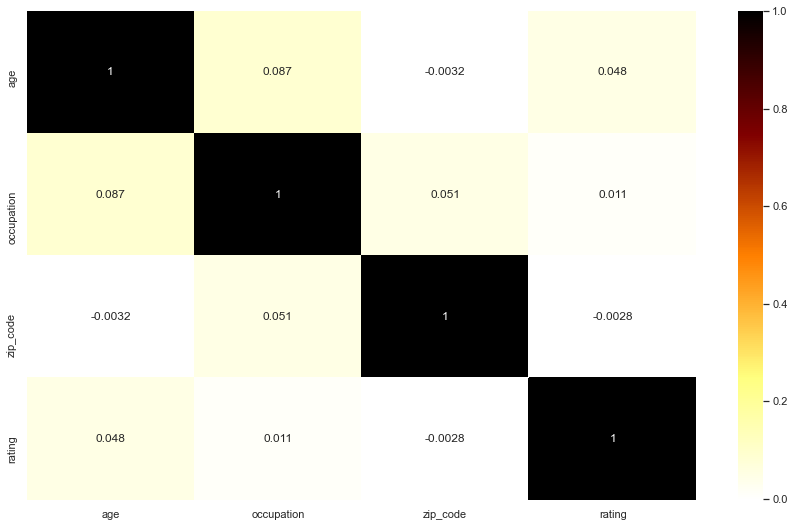

In [56]:
plt.figure(figsize=(15,9))
sns.heatmap(corr_test,annot=True,cmap=plt.cm.afmhot_r)

In [57]:
X=master_data_dummy4.drop('rating',axis=1)
y=master_data_dummy4['rating']

#### Statistical Analysis through Ordinary Least Square: OLS(Ordinary least squares (OLS) regression is a statistical method of analysis that estimates the relationship between one or more independent variables and a dependent variable)

In [58]:
import statsmodels.api as sms
model = sms.OLS(y,X).fit()

In [59]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 rating   R-squared (uncentered):                   0.915
Model:                            OLS   Adj. R-squared (uncentered):              0.915
Method:                 Least Squares   F-statistic:                          4.107e+05
Date:                Tue, 21 Dec 2021   Prob (F-statistic):                        0.00
Time:                        14:56:58   Log-Likelihood:                     -1.3317e+06
No. Observations:              881516   AIC:                                  2.663e+06
Df Residuals:                  881493   BIC:                                  2.664e+06
Df Model:                          23                                                  
Covariance Type:            nonrobust                                                  
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
age                 0.0043      0.000     35.692      0.000       0.004       0.005
occupation          0.0017      0.000      9.233      0.000       0.001       0.002
zip_code        -8.499e-08   3.66e-08     -2.324      0.020   -1.57e-07   -1.33e-08
timestamp_hours  1.256e-05   2.16e-08    580.450      0.000    1.25e-05    1.26e-05
M                  -0.0357      0.003    -12.832      0.000      -0.041      -0.030
Film-Noir           0.4353      0.009     46.921      0.000       0.417       0.453
Crime               0.1011      0.004     22.594      0.000       0.092       0.110
Mystery             0.0047      0.006      0.743      0.457      -0.008       0.017
Romance            -0.0103      0.003     -3.005      0.003      -0.017      -0.004
Thriller            0.0647      0.003     18.754      0.000       0.058       0.071
War                 0.2945      0.005     60.836      0.000       0.285       0.304
Drama               0.2327      0.003     74.681      0.000       0.227       0.239
Action             -0.0939      0.003    -28.261      0.000      -0.100      -0.087
Children's         -0.3085      0.006    -50.722      0.000      -0.320      -0.297
Documentary         0.4271      0.013     31.661      0.000       0.401       0.454
Sci-Fi             -0.0164      0.004     -4.591      0.000      -0.023      -0.009
Animation           0.3815      0.007     51.506      0.000       0.367       0.396
Western             0.1109      0.008     13.272      0.000       0.095       0.127
Fantasy             0.0741      0.007     10.952      0.000       0.061       0.087
Horror             -0.2822      0.005    -59.985      0.000      -0.291      -0.273
Comedy             -0.0053      0.003     -1.734      0.083      -0.011       0.001
Adventure           0.0107      0.004      2.721      0.007       0.003       0.018
Musical             0.1438      0.006     22.317      0.000       0.131       0.156
==============================================================================
Omnibus:                    40753.179   Durbin-Watson:                   1.568
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            43304.995
Skew:                          -0.517   Prob(JB):                         0.00
Kurtosis:                       2.670   Cond. No.                     3.19e+06
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 3.19e+06. This might indicate that there are
strong multicollinearity or other numerical problem

#### Train, Test Split:

In [60]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

#### Feature Scailing

In [61]:
# Feature Scailing
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

#### To check score on different model

In [62]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train,y_train)

LogisticRegression()

In [63]:
y_pred = lr.predict(X_test)
pd.Series(y_pred).head() 

0    4
1    3
2    4
3    4
4    4
dtype: int64

In [64]:
y_test.head()

910169    5
2189      3
258565    5
546433    2
461945    5
Name: rating, dtype: int64

In [65]:
lr.score(X_test,y_test)

0.3502448431680248

In [66]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test,y_pred)
print(matrix)

[[    0     0  1580 12841   204]
 [    0     0  2254 25823   569]
 [    0     0  4060 63067  2056]
 [    0     0  3910 84603  3982]
 [    0     0  1978 53567  3961]]


In [67]:
from sklearn.metrics import classification_report
report = classification_report(y_test,y_pred)
print(report)

              precision    recall  f1-score   support

           1       0.00      0.00      0.00     14625
           2       0.00      0.00      0.00     28646
           3       0.29      0.06      0.10     69183
           4       0.35      0.91      0.51     92495
           5       0.37      0.07      0.11     59506

    accuracy                           0.35    264455
   macro avg       0.20      0.21      0.14    264455
weighted avg       0.28      0.35      0.23    264455



In [68]:
from sklearn.ensemble import RandomForestClassifier
rm = RandomForestClassifier()
rm.fit(X_train,y_train)

RandomForestClassifier()

In [69]:
rm.score(X_test,y_test)

0.3600461326123537

In [70]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [71]:
dt.score(X_test,y_test)

0.34943563177100073

In [72]:
#from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold

In [73]:
#cv = ShuffleSplit(n_splits=5,train_size=0.7,random_state=0)
def get_score(x,y):
    cv = StratifiedKFold(n_splits=3,shuffle=True,random_state=10)
    logistic = cross_val_score(LogisticRegression(),X,y,cv=cv).mean()
    random = cross_val_score(RandomForestClassifier(),X,y,cv=cv).mean()
    decision_tree = cross_val_score(DecisionTreeClassifier(),X,y,cv=cv).mean()
    score ={'Logistic_score':logistic,'RandomForest_score':random,'DecisionTree_score':decision_tree}
    return score

In [74]:
get_score(X,y)

{'Logistic_score': 0.3486005926150592,
 'RandomForest_score': 0.36245173129839614,
 'DecisionTree_score': 0.3471553556933998}

#### Age, and Occupation are the main features affecting the ratings for the movies